In [429]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.formula.api as sm

# Chapter 3: Exercises

## Conceptual

**(1.) Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of `sales`, `TV`, `radio`, and `newspaper`, rather than in terms of the coefficients of the linear model.**

The null hypotheses is that each of the advertising mediums (TV, radio, and newspaper) do not have a relationship with the response variable (sales). The alternatvie hypotheses is that each advertising medium does have a relationship with sales. Based on Table 3.4 we can reject the null hypothesis and accept the alternative hypothesis for both TV and radio. This is because the p-values for each variable are <0.05. Small p-values indicate that it is unlikely to observe such a substantial association between the predictor and the response due to chance. Hence, if we see a small p-value (typically less than 0.05 or 0.01) then we can infer that there is an association between the predictor and the response. The opposite is true for newspaper. The coefficient estimate is not sufficiently far enough from zero and the p-value is much larger than 0.05. Therefore we do not reject the null hypothesis for the newspaper predictor.

**(2.) Carefully explain the differences between the KNN classifier and KNN regression methods.**

The KNN classifier classifies an observation to a class with the highest estimated probability while KNN regression identifies the K training observations that are closest to an observation and then estimates its value by using the average of all K training responses.

**(3.) Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ, X3 = Gender (1 for Female and 0 for Male), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and Gender. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get `βˆ0 = 50, βˆ1 = 20 , βˆ2 = 0.07, βˆ3 = 35, βˆ4 = 0.01, βˆ5 = −10`.**

In [430]:
B0 = 50    # Intercept
B1 = 20    # GPA
B2 = 0.07  # IQ
B3 = 35    # Gender (1 for female and 0 for male)
B4 = 0.01  # Interaction btwn GPA and IQ
B5 = -10   # Interaction between GPA and Gender

In [431]:
male = B0 + B1 + B2 + B4 # drop B3 and B5 bc gender=0 for male
female =  B0 + B1 + B2 + B3 + B4 + B5
print("Male earnings: " + str(male))
print("Female earnings: " + str(female))

Male earnings: 70.08
Female earnings: 95.08


**Lets loop through GPA's while holding others constant to see when GPA starts to make a difference.**

In [432]:
for i in np.arange(0.0, 4.25, 0.25):
    male = B0 + B1*i + B2 + B4*i # drop B3 and B5 bc gender=0 for male
    female =  B0 + B1*i + B2 + B3 + B4*i + B5*i
    print("\nGPA @ " + str(i) + " = male earnings: " + str(male))
    print("GPA @ " + str(i) + " = female earnings: " + str(female))


GPA @ 0.0 = male earnings: 50.07
GPA @ 0.0 = female earnings: 85.07

GPA @ 0.25 = male earnings: 55.0725
GPA @ 0.25 = female earnings: 87.57249999999999

GPA @ 0.5 = male earnings: 60.075
GPA @ 0.5 = female earnings: 90.07499999999999

GPA @ 0.75 = male earnings: 65.07749999999999
GPA @ 0.75 = female earnings: 92.57749999999999

GPA @ 1.0 = male earnings: 70.08
GPA @ 1.0 = female earnings: 95.08

GPA @ 1.25 = male earnings: 75.0825
GPA @ 1.25 = female earnings: 97.5825

GPA @ 1.5 = male earnings: 80.085
GPA @ 1.5 = female earnings: 100.085

GPA @ 1.75 = male earnings: 85.08749999999999
GPA @ 1.75 = female earnings: 102.58749999999999

GPA @ 2.0 = male earnings: 90.08999999999999
GPA @ 2.0 = female earnings: 105.08999999999999

GPA @ 2.25 = male earnings: 95.09249999999999
GPA @ 2.25 = female earnings: 107.5925

GPA @ 2.5 = male earnings: 100.095
GPA @ 2.5 = female earnings: 110.095

GPA @ 2.75 = male earnings: 105.0975
GPA @ 2.75 = female earnings: 112.5975

GPA @ 3.0 = male earnings:

**(a)**
> Females have higher earnings until GPA > 3.5. From there males start to have higher earnings. So, ii and iii are correct.

**(b) Predict the salary of a female with IQ of 110 and GPA of 4.0**

In [433]:
IQ = 110
GPA = 4

female =  (B0 + B1*GPA + B2*IQ + B3 + B4*IQ*GPA + B5*GPA)*1000

print("Salary: " + str(female))

Salary: 137100.0


**(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.**

>False. You cannot conclude that just because the coefficient is small there is little evidence of an interaction effect. The p-value for the interaction term is how you determine whether there is evidence to include the interaction term variable in your model.

**(4) I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. `Y = β0 + β1X + β2X^2 + β3X^3 + ε`.**

**(a) Suppose that the true relationship between X and Y is linear, i.e. `Y = β0 + β1X + ε`. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.**

>We expect the cubic regression to have lower _training_ RSS since the model will more closely match the subltle nuances of the training data. We expect the line to be wiggly. Since we know the true relationship is linear, the cubic model will likely be overfitting the training data.

**(b) Answer (a) using test rather than training RSS**

>Since the true relationship between X and Y is linear we expect the linear model to have lower _test_ RSS since it more closely fits the true data.

**(c) SupposethatthetruerelationshipbetweenXandYisnotlinear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.**

>Since the true relationship is not linear we expect the cubic regression to have a lower training RSS. Since it will more closely fit to the training data.

**(d) Answer (c) using test rather than training RSS.**

>Tough to tell. It depends on the level of non-linearity. If its higly non linear than we expect the cubic regression to have lower RSS, but if the true realationship is only slightly non-linear the linear regresssion might have the lower RSS.

**(5) Consider the fitted values that result from performing linear regres- sion without an intercept. In this setting, the ith fitted value takes the form**

$$\hat{y_i} = x_i \hat{B}$$ 

**where**

$$\hat{B} = \frac{\sum\limits_{j=1}^n x_k y_k}
{\sum\limits_{j=1}^nx_j^2}$$

**Show that we can write**

$$\hat{y_i} = \sum\limits_{k=1}^n a_i y_i$$

**What is $a_i$?**

**Solution:**

$$\hat{y_i} = \frac{x_i\sum\limits_{k=1}^n x_k y_k}{\sum\limits_{j=1}^nx_j^2}$$

$$\hat{y_i} = \sum\limits_{k=1}^n (\frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2})y_k$$

$$a_i = \frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2}$$

**(6) Using (3.4), argue that in the case of simple linear regression, the
least squares line always passes through the point $(\bar{x_i},\bar{y_i})$.**

**eq 1.** $$\hat{y_{i}} = \hat{B_0} + \hat{B_1}\bar{x_i}$$

**eq 2.**$$\hat{B_1}  = \frac{{\sum\nolimits_{i = 1}^n {({x_i} - \bar x)} ({y_i} - \bar y)}}{{{{\sum\nolimits_{i = 1}^n {({x_i} - \bar x)} }^2}}}$$

**eq 3.**$$\hat{B_0} = \bar{y} - \hat{B_1}\bar{x}$$

**So**

When ${x_i} = \bar x$, then $\hat{B_1}=0$ (eq. 2) and $\hat{B_0} = \bar{y}$ (eq. 3) and $\hat{y_{i}}$ evaluates to equal $\bar{y}$ (eq. 1)

## Applied

**(8) This question involves the use of simple linear regression on the Auto data set.**

**(a) Use the `lm()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summary()` function to print the results.**

In [434]:
# In this data set missing values are encoded as '?' so we will need to
#  pass that to the `na_values` parameter.

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv'
                 , na_values='?')
df = df.dropna() # drop columns with NaN
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [435]:
lm = sm.ols('mpg~horsepower', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           7.03e-81
Time:                        13:27:10   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comment on the output. For example:**

* i. Is there a relationship between the predictor and the response?

>Yes, p<0.05 for each, so there is a relationship. Also, F-statistic is large and significant (p<0.05).

* ii. How strong is the relationship between the predictor and the response

> strong, high t-value and p-value close to zero.

* iii. Is the relationship between the predictor and the response positive or negative?

>The relationship is negative. The more horsepower, the lower the mpg. You can see this in the negative coeficient for horsepower.

* iv. What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95 % confidence and prediction intervals?

In [436]:
B0 = 39.9359 #intercept coef
B1 = -0.1578 #horsepower coef
horsepower = 98

Y = B0 + B1*horsepower
print(Y)

24.4715


In [437]:
lm.predict({'horsepower': 98})

0    24.467077
dtype: float64

In [438]:
p = lm.get_prediction({'horsepower': 98})
p.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


In [439]:
# confidence interval: average mpg over all cars
# prediciton interval: for a given car

print("Confidence interval: (" + str(p.summary_frame().iloc[0][2]) +
" , " + str(p.summary_frame().iloc[0][3]) + ")")

print("Prediciton interval: (" + str(p.summary_frame().iloc[0][4]) +
" , " + str(p.summary_frame().iloc[0][5]) + ")")

Confidence interval: (23.973078960703944 , 24.961075344320918)
Prediciton interval: (14.809396070967123 , 34.12475823405774)


**(b) Plot the response and the predictor. Use the `abline()` function to display the least squares regression line.**

/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


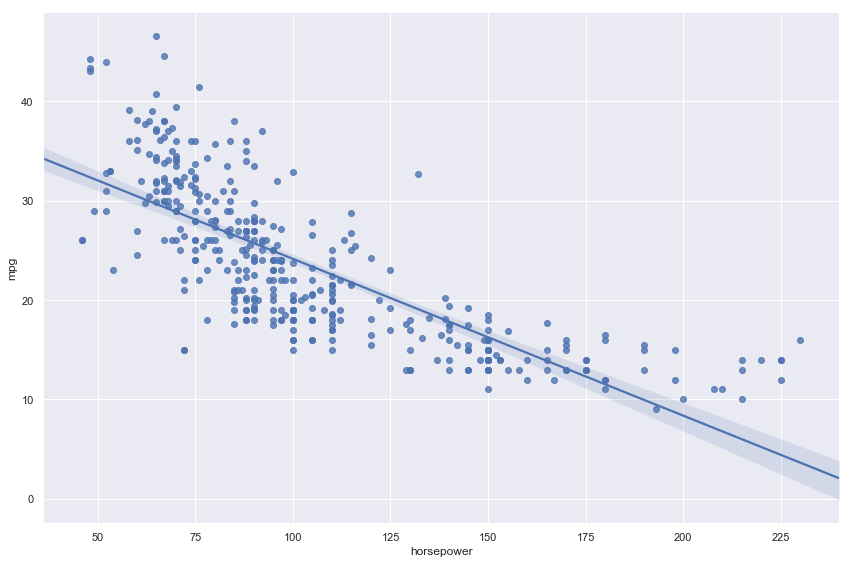

In [440]:
sns.lmplot(x='horsepower', y='mpg', data=df, height=8, aspect=1.5)
plt.show()

**(c) Use the `plot()` function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.**

/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


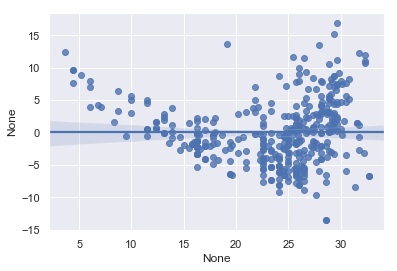

In [441]:
sns.regplot(lm.fittedvalues, lm.resid)
plt.show()

There appears some non-linearity in the data. There is also heteroscedasticity, as you can see in the funnel shape in the residual plot. This means we have inconstant variance in our error terms. One solution may be transforming the response variable using a concave function such as log or sqrt.

**(9.) This question involves the use of multiple linear regression on the `Auto` data set.**

**(a) Produce a scatterplot matrix which includes all of the variables in the data set.**

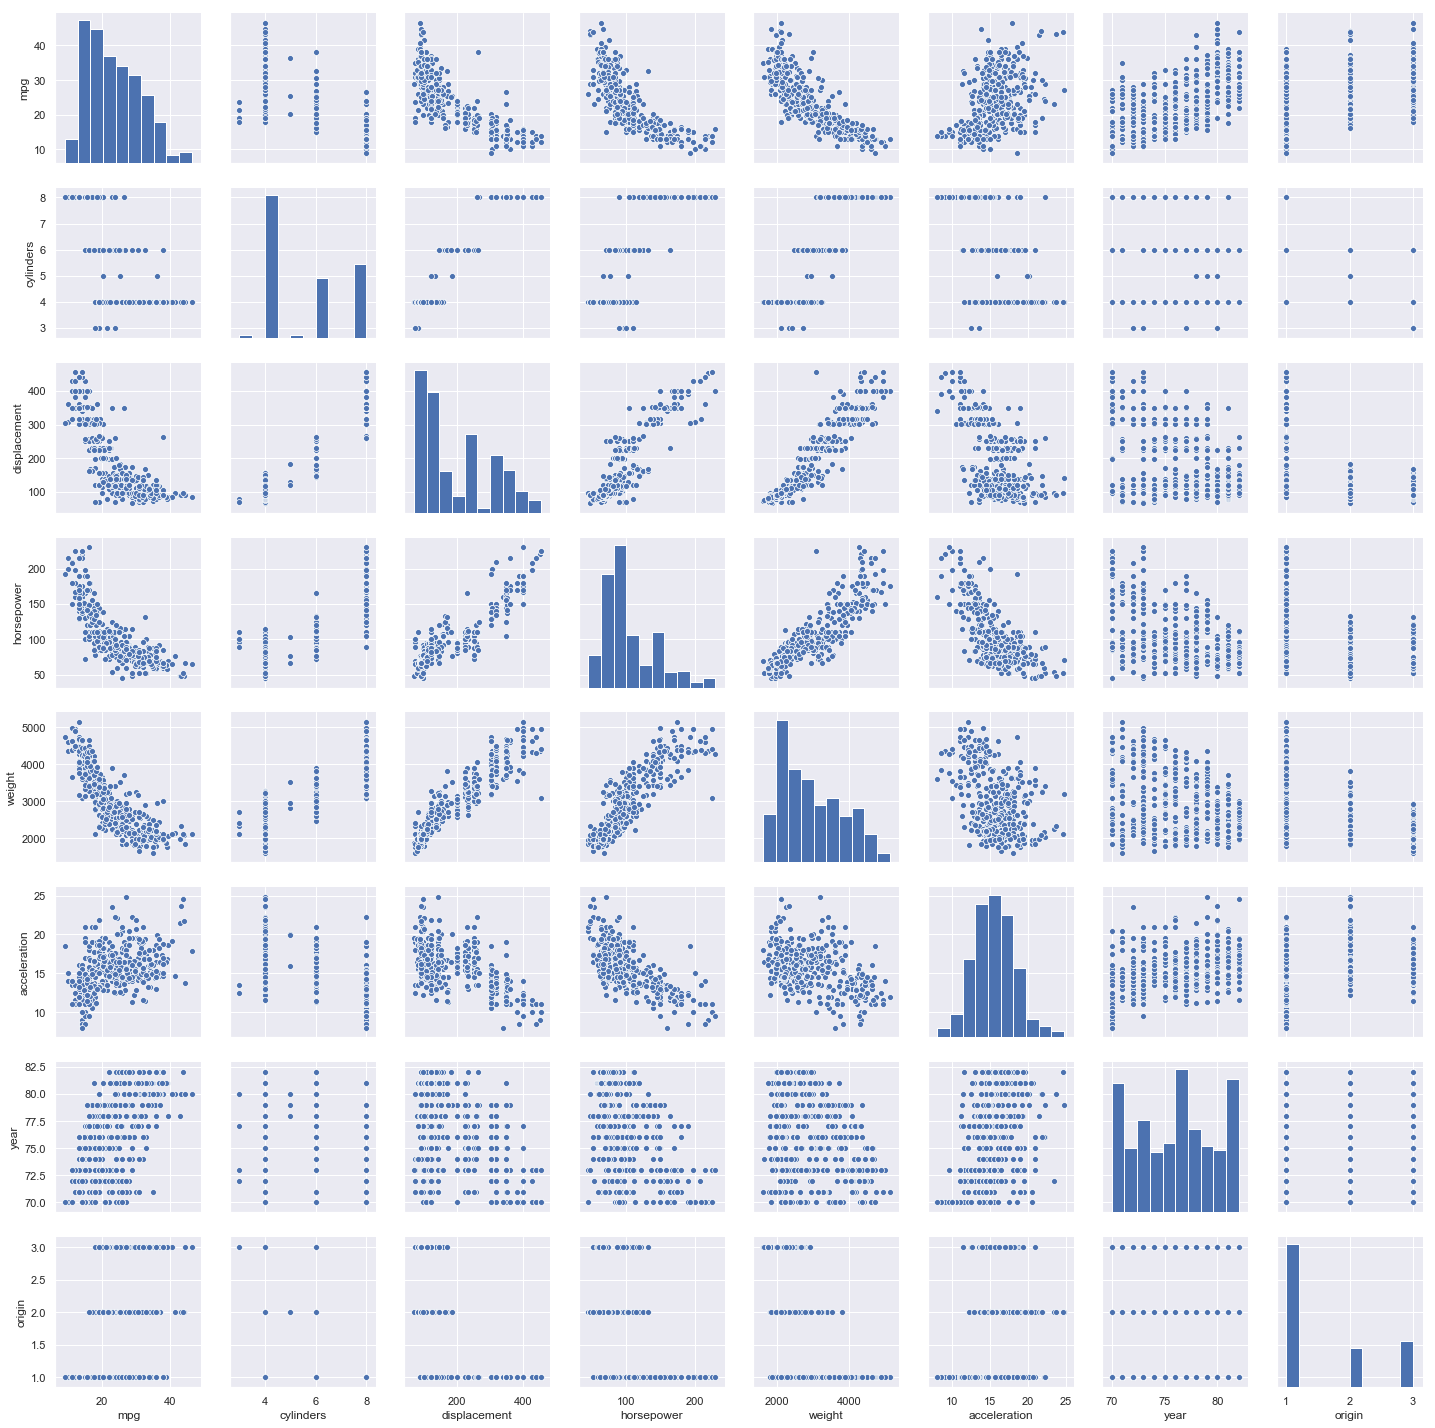

In [442]:
sns.pairplot(df)
plt.show()

**(b) Compute the matrix of correlations between the variables using the function `cor()`. You will need to exclude the name variable, which is qualitative.**

In [443]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


**(c) Use the `lm()` function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the `summary()` function to print the results. Comment on the output.**

In [444]:
lm = sm.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin',
           data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 12 Oct 2018   Prob (F-statistic):          2.04e-139
Time:                        13:27:20   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* i. Is there a relationship between the predictors and the response?

>Yes, F-statistic is large and significant (p<0.05).

* ii. Which predictors appear to have a statistically significant relationship to the response?

>Displacement, weight, year and origin each have a p-value < 0.05, and therefore a relationship with the response variable (mpg).

* iii. What does the coefficient for the year variable suggest?

>It's positive (0.7508), so as year progresses mpg increases.

**(d) Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?**

/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


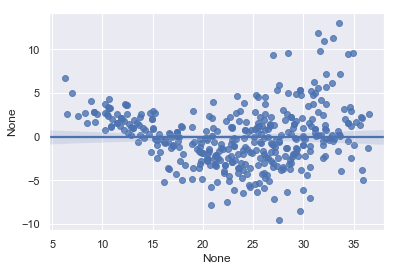

In [445]:
sns.regplot(lm.fittedvalues, lm.resid)
plt.show()

Heteroskedastic.

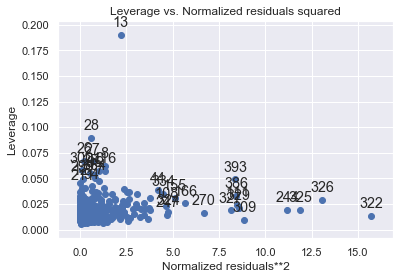

In [446]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(lm)
plt.show()

Observation 13 has high leverage, but not a high residual.

**(e) Use the `*` and `:` symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?**

In [447]:
lm = sm.ols('mpg ~ + horsepower * weight', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     384.8
Date:                Fri, 12 Oct 2018   Prob (F-statistic):          7.26e-116
Time:                        13:27:21   Log-Likelihood:                -1090.7
No. Observations:                 392   AIC:                             2189.
Df Residuals:                     388   BIC:                             2205.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            63.5579      2.343     27.127      0.000      58.951      68.164
horsepower           -0.2508      0.027     -9.195      0.000      -0.304      -0.197
weight               -0.0108      0.001    -13.921      0.000      -0.012      -0.009
horsepower:weight  5.355e-05   6.65e-06      8.054      0.000    4.05e-05    6.66e-05
==============================================================================
Omnibus:                       34.175   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.522
Skew:                           0.577   Prob(JB):                     1.45e-12
Kurtosis:                       4.417   Cond. No.                     4.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adding the interaction term `horsepower`x`weight` (R2=0.748) improves the model compared to just `horsepower` (R2=0.606). All variables and their respective interactions are statistically significant (p<0.05).

**(f) Try a few different transformations of the variables, such as log(X), sqrt(X), X^2. Comment on your findings.**

In [448]:
lm = sm.ols('mpg ~ horsepower + np.log(horsepower)', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     416.6
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           1.98e-97
Time:                        13:27:21   Log-Likelihood:                -1136.8
No. Observations:                 392   AIC:                             2280.
Df Residuals:                     389   BIC:                             2292.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            156.0406     12.083     12.914      0.000     132.285     179.796
horsepower             0.1185      0.029      4.044      0.000       0.061       0.176
np.log(horsepower)   -31.5982      3.284     -9.623      0.000     -38.054     -25.142
==============================================================================
Omnibus:                       17.484   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.245
Skew:                           0.162   Prob(JB):                     3.01e-09
Kurtosis:                       4.516   Cond. No.                     6.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [449]:
lm = sm.ols('mpg ~ horsepower + np.square(horsepower)', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           5.40e-99
Time:                        13:27:21   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                56.9001      1.800     31.604      0.000      53.360      60.440
horsepower               -0.4662      0.031    -14.978      0.000      -0.527      -0.405
np.square(horsepower)     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [450]:
lm = sm.ols('mpg ~ horsepower + np.sqrt(horsepower)', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     423.0
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           2.59e-98
Time:                        13:27:21   Log-Likelihood:                -1134.8
No. Observations:                 392   AIC:                             2276.
Df Residuals:                     389   BIC:                             2287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             105.3158      6.647     15.845      0.000      92.248     118.384
horsepower              0.4191      0.059      7.144      0.000       0.304       0.534
np.sqrt(horsepower)   -12.4857      1.263     -9.883      0.000     -14.970     -10.002
==============================================================================
Omnibus:                       17.487   Durbin-Watson:                   1.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.396
Skew:                           0.175   Prob(JB):                     4.60e-09
Kurtosis:                       4.493   Cond. No.                     3.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All three transformations of horsepower (log, sqrt, and squared) were statistically significant and have higher R2 and therefore a better fit. A larger proportion of variability in Y can be explained using X.

**(10) This question should be answered using the `Carseats` data set.**

**(a) Fit a multiple regression model to predict `Sales` using `Price`,
`Urban`, and `US`.**

In [451]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Carseats.csv")

df=df.drop(columns=['Unnamed: 0'])
print("Shape of df: " + str(df.shape))
df.head()

Shape of df: (400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [452]:
# Examine the categoricals
df.describe(include='object')

,ShelveLoc,Urban,US
count,400,400,400
unique,3,2,2
top,Medium,Yes,Yes
freq,219,282,258


In [453]:
print(df.ShelveLoc.value_counts())
print(df.Urban.value_counts())
print(df.US.value_counts())

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Yes    282
No     118
Name: Urban, dtype: int64
Yes    258
No     142
Name: US, dtype: int64


In [454]:
# use the C() operator for categoricals
lm = sm.ols('Sales ~ Price + C(Urban) + C(US)', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           2.39e-23
Time:                        13:27:21   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0435      0.651     20.036      0.000      11.764      14.323
C(Urban)[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
C(US)[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price              -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [455]:
print("RSE: " + str(np.sqrt(lm.scale)))

RSE: 2.4724924402701642


**(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!**

`Price` is statistically significant and negatively correlated with sales. A one unit increase in `Price` (dollars?) would lead to a decrease in sales of 54.5 units.

`Urban` is not statistically significant (p=0.936), but is negatively correlated with Sales.

`US` is statistically significant and is positively correlated with sales. If the store is in the US sales would increase by 1,200.6 units.

**(c) Write out the model in equation form, being careful to handle the qualitative variables properly.**

Y = 13.0435 - 0.0545`Price` - 0.0219`Urban=Yes` + 1.2006`US=Yes` + error

**(d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?**

Due to their low p-values, I would reject the null hypothese for `US=Yes` and `Price`. And conclude that their exists a relationship between those two variables and the response variable `Sales`. Since the p-value for `Urban` is too high we cannot reject the null hypothesis.

**(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.**

In [456]:
lm = sm.ols('Sales ~ Price  + C(US)', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           2.66e-24
Time:                        13:27:21   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652      0.000      11.790      14.271
C(US)[T.Yes]     1.1996      0.258      4.641      0.000       0.692       1.708
Price           -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [457]:
print("RSE: " + str(np.sqrt(lm.scale)))

RSE: 2.469396800574444


**(f) How well do the models in (a) and (e) fit the data?**

About the same. Comprable R2 and RSE. Though (e) has slightly better RSE.

**(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).**

In [458]:
# note: these are also found in the model summary.

lm.conf_int()

,0,1
Intercept,11.79032,14.271265
C(US)[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


**(h) Is there evidence of outliers or high leverage observations in the model from (e)?**

/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


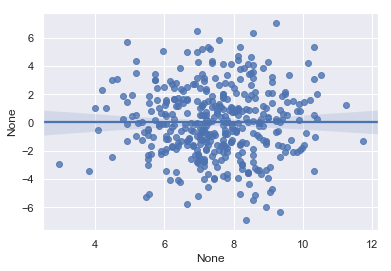

In [459]:
sns.regplot(lm.fittedvalues, lm.resid)
plt.show()

Doesn't appear to have outliers

/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


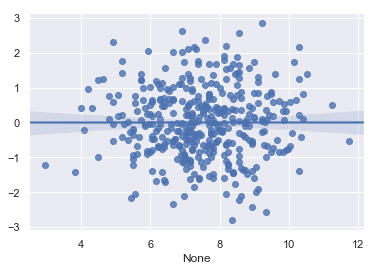

In [460]:
# studentized residuals

sns.regplot(lm.fittedvalues, lm.get_influence().get_resid_studentized_external())
plt.show()

Studentized residuals within -3,3

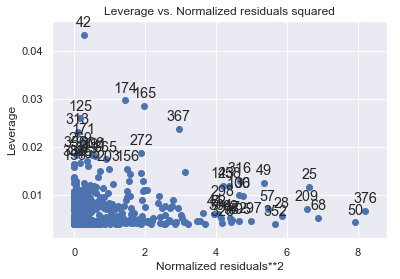

In [461]:
plot_leverage_resid2(lm)
plt.show()

Observation 42 does have high leverage.

**(11.) In this problem we will investigate the t-statistic for the null hypoth- esis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor `x` and a response `y` as follows.

In [462]:
np.random.seed(1)
x = np.random.randn(100)
y = 2*x + np.random.randn(100)

**(a) Perform a simple linear regression of `y` onto `x`, without an intercept. Report the coefficient estimate βˆ, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results. (You can perform regression without an intercept using the command `lm(y∼x+0)`.)**

In [463]:
# use OLS (capitalized) - bc https://www.statsmodels.org/dev/example_formulas.html
#  In general, lower case models accept formula and df arguments, whereas upper case ones take endog and exog design matrices.

lm = sm.OLS(y, x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           3.46e-36
Time:                        13:27:22   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The variable is significant, you can reject the null hypothesis.

**(b) Now perform a simple linear regression of `x` onto `y` without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.**

In [464]:
lm = sm.OLS(x, y).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           3.46e-36
Time:                        13:27:22   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Same as above. The variable is significant, you can reject the null hypothesis. The coef is smaller.

**(c) What is the relationship between the results obtained in (a) and (b)?**

They share alot of the same results... R2, t-statistic, F-statistic.

**(d)-(e)** The t-statistic is the same for both because t-stat = coef/std.err. These models are the same just with diff proportions.

**(f) In `R`, show that when regression is performed _with_ an intercept, the t-statistic for H0 : β1 = 0 is the same for the regression of `y` onto `x` as it is for the regression of `x` onto `y`.**

In [465]:
### need add_constant from statsmodel.api
from statsmodels.api import add_constant

In [466]:
lm = sm.OLS(y, add_constant(x)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           5.39e-36
Time:                        13:27:22   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1470      0.094      1.564      0.121      -0.039       0.334
x1             2.0954      0.106     19.783      0.000       1.885       2.306
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [467]:
lm = sm.OLS(x, add_constant(y)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           5.39e-36
Time:                        13:27:22   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0440      0.040     -1.090      0.279      -0.124       0.036
x1             0.3817      0.019     19.783      0.000       0.343       0.420
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.611
Skew:                           0.118   Prob(JB):                        0.737
Kurtosis:                       2.698   Cond. No.                         2.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As seen in the above two summary's, the t-statistic for B1 is the same in both.

**(12.) This problem involves simple linear regression without an intercept.**

**(a) Recall that the coefficient estimate βˆ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?**

>The coef are the same when $\sum x_{i}^2=\sum y_{i}^2$

> because $ \frac{{\sum {{x_i}{y_i}} }}{{\sum {x_i^2} }} = \frac{{\sum {{y_i}{x_i}} }}{{\sum {y_i^2} }} $

**(b) Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is _different from_ the coefficient estimate for the regression of Y onto X.**

>Problem # 11 parts a. and b. illustrate this phenomenon. The each have different coefficient estimates.

**(c) Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is _the same_ as the coefficient estimate for the regression of Y onto X.**

In [468]:
np.random.seed(1)
x = np.random.randn(100)
y = np.random.choice(x, 100, replace=False)

In [469]:
# check to see if condition is satisfied from part a

print(sum(x**2))
print(sum(y**2))

78.71718048502926
78.71718048502935


In [470]:
lm = sm.OLS(x, y).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.778
Date:                Fri, 12 Oct 2018   Prob (F-statistic):             0.0312
Time:                        13:27:23   Log-Likelihood:                -127.57
No. Observations:                 100   AIC:                             257.1
Df Residuals:                      99   BIC:                             259.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2146      0.098      2.186      0.031       0.020       0.409
==============================================================================
Omnibus:                        0.028   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.986   Jarque-Bera (JB):                0.155
Skew:                          -0.026   Prob(JB):                        0.926
Kurtosis:                       2.815   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [471]:
lm = sm.OLS(y, x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.778
Date:                Fri, 12 Oct 2018   Prob (F-statistic):             0.0312
Time:                        13:27:23   Log-Likelihood:                -127.57
No. Observations:                 100   AIC:                             257.1
Df Residuals:                      99   BIC:                             259.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2146      0.098      2.186      0.031       0.020       0.409
==============================================================================
Omnibus:                        0.182   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.913   Jarque-Bera (JB):                0.073
Skew:                          -0.066   Prob(JB):                        0.964
Kurtosis:                       2.997   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Same coefficient estimates.

**(13.) In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use set.seed(1) prior to starting part (a) to ensure consistent results.**

**(a) Using the `rnorm()` function, create a vector, x, containing 100 observations drawn from a N (0, 1) distribution. This represents a feature, X.**

**(b) Using the rnorm() function, create a vector, eps, containing 100 observations drawn from a N(0,0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.**

In [472]:
np.random.seed(1)
x = np.random.randn(100)
print("Mean x: " + str(np.mean(x)))
print("Std. dev x: " + str(np.std(x)))

print("\n")
eps = 0.25 * np.random.randn(100)
print("Mean eps: " + str(np.mean(eps)))
print("Std. dev eps: " + str(np.std(eps)))

Mean x: 0.060582852075698704
Std. dev x: 0.885156213831585


Mean eps: 0.03819869440504963
Std. dev eps: 0.2329987043637489


**(c) Using x and eps, generate a vector y according to the model
$Y =−1+0.5X+ε.$**

**What is the length of the vector y? What are the values of β0 and β1 in this linear model?**

In [473]:
y = -1 + .5 * x + eps 

print("Length of y: " + str(len(y)))
print("B0 is -1 and B1 is 0.5.")

Length of y: 100
B0 is -1 and B1 is 0.5.


**(d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.**

We observe a linear relationship.

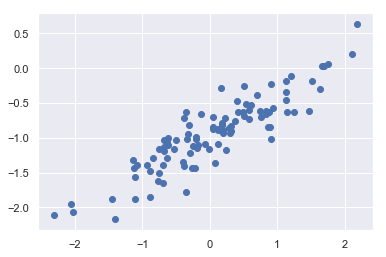

In [474]:
plt.scatter(x, y);

**(e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?**

>They are very close. βˆ0 = -0.9632, β0 = -1. And βˆ1 = 0.5239, β1 = .5

In [475]:
lm = sm.OLS(y, add_constant(x)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           5.39e-36
Time:                        13:27:23   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9632      0.023    -40.999      0.000      -1.010      -0.917
x1             0.5239      0.026     19.783      0.000       0.471       0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() command to create an appropriate legend.**

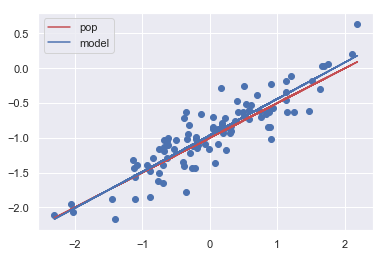

In [476]:
plt.scatter(x, y)
plt.plot(x, -1 + 0.5*x, label='pop', c='r')
plt.plot(x, lm.params[0] + lm.params[1]*x, label='model')
plt.legend();

**(g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.**

>R2 does not improve and the quadradic term is not significant.

In [477]:
x2 = np.column_stack((add_constant(x), np.square(x)))
lm = sm.OLS(y, x2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           1.32e-34
Time:                        13:27:23   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9663      0.029    -33.486      0.000      -1.024      -0.909
x1             0.5234      0.027     19.582      0.000       0.470       0.576
x2             0.0039      0.021      0.181      0.856      -0.038       0.046
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.**

We will create less noise in the data by reducing our std dev from eps.

>We see that the model improves. R2 is higher. And the model fits the data better. F-stat is higher, indicating there is even more reason to reject the null hypothesis.

In [478]:
np.random.seed(1)
x = np.random.randn(100)
print("Mean x: " + str(np.mean(x)))
print("Std. dev x: " + str(np.std(x)))

print("\n")
eps = 0.12 * np.random.randn(100) # less std dev than before
print("Mean eps: " + str(np.mean(eps)))
print("Std. dev eps: " + str(np.std(eps)))

y = -1 + .5 * x + eps 
print("\n")
print("Length of y: " + str(len(y)))
print("B0 is -1 and B1 is 0.5.")

lm = sm.OLS(y, add_constant(x)).fit()
lm.summary()

Mean x: 0.060582852075698704
Std. dev x: 0.885156213831585


Mean eps: 0.01833537331442382
Std. dev eps: 0.11183937809459947


Length of y: 100
B0 is -1 and B1 is 0.5.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1619.
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           9.62e-63
Time:                        13:27:23   Log-Likelihood:                 77.588
No. Observations:                 100   AIC:                            -151.2
Df Residuals:                      98   BIC:                            -146.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9824      0.011    -87.109      0.000      -1.005      -0.960
x1             0.5115      0.013     40.238      0.000       0.486       0.537
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

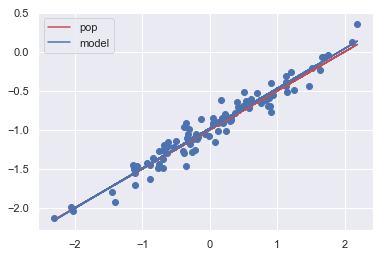

In [479]:
plt.scatter(x, y)
plt.plot(x, -1 + 0.5*x, label='pop', c='r')
plt.plot(x, lm.params[0] + lm.params[1]*x, label='model')
plt.legend();

**(i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.**

We create more noise by increasing the std dev on eps.

>R2 gets worse. F-stat is less. More noise creates worse fit.

In [480]:
np.random.seed(1)
x = np.random.randn(100)
print("Mean x: " + str(np.mean(x)))
print("Std. dev x: " + str(np.std(x)))

print("\n")
eps = 0.5 * np.random.randn(100) # more std dev than originally
print("Mean eps: " + str(np.mean(eps)))
print("Std. dev eps: " + str(np.std(eps)))

y = -1 + .5 * x + eps 
print("\n")
print("Length of y: " + str(len(y)))
print("B0 is -1 and B1 is 0.5.")

lm = sm.OLS(y, add_constant(x)).fit()
lm.summary()

Mean x: 0.060582852075698704
Std. dev x: 0.885156213831585


Mean eps: 0.07639738881009926
Std. dev eps: 0.4659974087274978


Length of y: 100
B0 is -1 and B1 is 0.5.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           2.20e-17
Time:                        13:27:23   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.000      -1.020      -0.833
x1             0.5477      0.053     10.342      0.000       0.443       0.653
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

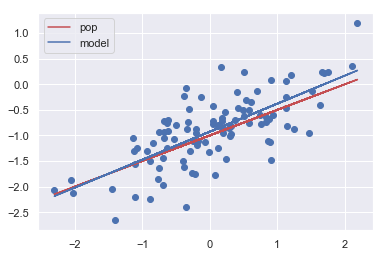

In [481]:
plt.scatter(x, y)
plt.plot(x, -1 + 0.5*x, label='pop', c='r')
plt.plot(x, lm.params[0] + lm.params[1]*x, label='model')
plt.legend();

**(j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.**

The confidence intervals for our coefficients get wider as more noise is added.

**14. This problem focuses on the collinearity problem.
(a) Perform the following commands in R:**

* set.seed(1)
* x1=runif(100)
* x2=0.5*x1+rnorm(100)/10
* y=2+2*x1+0.3*x2+rnorm(100)

**The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?**

The form of the linear model is: $Y = 2 + 2x1 + 0.3x2 + \epsilon$

The coefficients are:
>$\beta_0 = 2$,  $\beta_1 = 2$,  $\beta_2 = 0.3$

In [557]:
np.random.seed(1)
x1 = np.random.random(100)
x2 = .5 * x1 + np.random.randn(100) / 10
y = 2 + 2 * x1 + .3 * x2 + np.random.randn(100)

**(b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.**

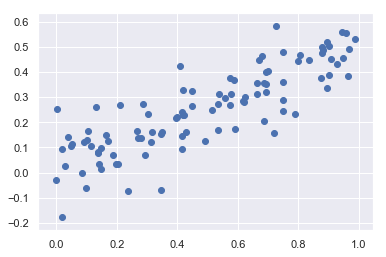

In [484]:
plt.scatter(x1, x2);

In [485]:
np.corrcoef(x1, x2)

array([[1.        , 0.83905962],
       [0.83905962, 1.        ]])

**(c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?**

In [525]:
x = np.column_stack((add_constant(x2), x1))
#x = np.column_stack((np.ones(100), x1, x2))
lm = sm.OLS(y, x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           4.40e-07
Time:                        13:43:04   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1893      0.199     11.021      0.000       1.795       2.584
x1             2.5024      1.140      2.194      0.031       0.239       4.766
x2             0.7046      0.637      1.107      0.271      -0.559       1.968
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [538]:
print("B^0= " + str(lm.params[0]) + " : p-value= " + str(lm.pvalues[0]))
print("B^1= " + str(lm.params[1]) + " : p-value= " + str(lm.pvalues[1]))
print("B^2= " + str(lm.params[2]) + " : p-value= " + str(lm.pvalues[2]))

B^0= 2.1892843976248195 : p-value= 8.5324025655439875e-19
B^1= 2.5024049586730555 : p-value= 0.030604176453188796
B^2= 0.7046285363120239 : p-value= 0.2712146164216032


**(d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?**

>Reject the null hypothesis B1=0. bc of p-value <<< 0.05

In [541]:
lm = sm.OLS(y, add_constant(x1)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           6.68e-07
Time:                        13:58:16   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2486      0.201     11.209      0.000       1.850       2.647
x1             1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?**

>Reject the null hypothesis B1=0. bc of p-value <<< 0.05

In [542]:
lm = sm.OLS(y, add_constant(x2)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           1.09e-07
Time:                        13:58:41   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2655      0.187     12.145      0.000       1.895       2.636
x1             3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.**

>No, they don't contradict eachother because x1 and x2 were correlated. By themselves in the model they are significant, but if both are used then only one is significant and the std errors are larger.

**(g) Now suppose we obtain one additional observation, which was unfortunately mismeasured.**
* x1=c(x1, 0.1)
* x2=c(x2, 0.8)
* y=c(y,6)

**Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.**

In [558]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)
print(x1.shape)
print(x2.shape)
print(y.shape)

(101,)
(101,)
(101,)


In [559]:
x = np.column_stack((add_constant(x2), x1))
lm = sm.OLS(y, x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           5.51e-08
Time:                        14:14:53   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1996      0.199     11.041      0.000       1.804       2.595
x1             3.4392      0.892      3.857      0.000       1.670       5.209
x2             0.2200      0.520      0.423      0.673      -0.812       1.252
==============================================================================
Omnibus:                        1.246   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.094
Skew:                          -0.254   Prob(JB):                        0.579
Kurtosis:                       2.956   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [560]:
lm = sm.OLS(y, add_constant(x1)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           9.15e-06
Time:                        14:15:24   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3583      0.208     11.331      0.000       1.945       2.771
x1             1.7225      0.368      4.679      0.000       0.992       2.453
==============================================================================
Omnibus:                        1.904   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.388
Skew:                           0.263   Prob(JB):                        0.500
Kurtosis:                       3.232   Cond. No.                         4.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [561]:
lm = sm.OLS(y, add_constant(x2)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           7.41e-09
Time:                        14:15:39   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2331      0.182     12.271      0.000       1.872       2.594
x1             3.7216      0.589      6.324      0.000       2.554       4.889
==============================================================================
Omnibus:                        1.271   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.094
Skew:                          -0.255   Prob(JB):                        0.579
Kurtosis:                       2.973   Cond. No.                         6.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


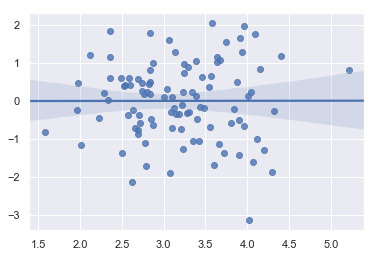

In [564]:
# studentized residuals

sns.regplot(lm.fittedvalues, lm.get_influence().get_resid_studentized_external())
plt.show()

**15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.**

**(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.**

In [565]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [634]:
# build a bunch of models

models = []
for i in df.columns[1:]:
    models.append(sm.ols('crim~'+i, data=df).fit())

In [639]:
# get the summary of each model

for i in models:
    print(i.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           5.51e-06
Time:                        16:58:04   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      0.0

In [671]:
# find all models without a significant variable

for i in models:
    if i.pvalues[1] > 0.05:
        print(i.params)

Intercept    3.744447
chas        -1.892777
dtype: float64


**(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?**

Can only reject zn, dis, rad, b, and medv. All others we cannot reject.

In [677]:
lm = sm.ols('crim~' + '+' .join(df.columns[1:]), data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           1.57e-56
Time:                        17:43:33   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
b             -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
Y = β0 +β1X +β2X2 +β3X3 +ε.**

In [695]:
# build a bunch of models

models = []
for i in df.columns[1:]:
    models.append(sm.ols('crim ~ {} + np.power({}, 2) + np.power({}, 3)'.format(i, i, i)
                         , data=df).fit())
    
#lm = sm.ols('mpg ~ horsepower + np.square(horsepower)', data=df).fit()

In [696]:
# get the summary of each model

for i in models:
    print(i.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Mon, 15 Oct 2018   Prob (F-statistic):           1.28e-06
Time:                        09:10:18   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8461      0.433     

In [699]:
# find all models WITH a significant variable

for i in models:
    if i.pvalues[1] < 0.05:
        print(i.params)
        print("\n")

Intercept          4.846050
zn                -0.332188
np.power(zn, 2)    0.006483
np.power(zn, 3)   -0.000038
dtype: float64


Intercept             3.662568
indus                -1.965213
np.power(indus, 2)    0.251937
np.power(indus, 3)   -0.006976
dtype: float64


Intercept            233.086591
nox                -1279.371252
np.power(nox, 2)    2248.544053
np.power(nox, 3)   -1245.702874
dtype: float64


Intercept           30.047612
dis                -15.554353
np.power(dis, 2)     2.452072
np.power(dis, 3)    -0.118599
dtype: float64


Intercept               477.184046
ptratio                 -82.360538
np.power(ptratio, 2)      4.635347
np.power(ptratio, 3)     -0.084760
dtype: float64


Intercept            53.165538
medv                 -5.094831
np.power(medv, 2)     0.155496
np.power(medv, 3)    -0.001490
dtype: float64




There is evidence of non-linear association between the response and several of the predictors. All predictors listed above are have statistical significance at least at the cube.